In [1]:
"""

Objectives:

1. Implement conditional logic to route the flow of data to different nodes.
2. Use START and END nodes to manage entry and exit points explicitly.
3. Design multiple nodes to perform different operations (addition, subtraction).
4. Create a router node to handle decision-making and control graph flow.

Main Goal: How to use "add_conditional_edges()"

"""

'\n\nObjectives:\n\n1. Implement conditional logic to route the flow of data to different nodes.\n2. Use START and END nodes to manage entry and exit points explicitly.\n3. Design multiple nodes to perform different operations (addition, subtraction).\n4. Create a router node to handle decision-making and control graph flow.\n\nMain Goal: How to use "add_conditional_edges()"\n\n'

In [3]:
from typing import TypedDict
from langgraph.graph import StateGraph, START, END

In [6]:
class AgentState(TypedDict):
  number1: int
  number2: int
  operation: str
  finalNumber: int

In [11]:
def adder(state: AgentState) -> AgentState:
  """ Node that adds the two numbers """

  state['finalNumber'] = state['number1'] + state['number2']
  return state

def subtractor(state: AgentState) -> AgentState:
  """ Node that subtracts the two numbers """

  state['finalNumber'] = state['number1'] - state['number2']
  return state


def decide_next_node(state: AgentState) -> AgentState:
  """ This node will decide the next node of the graph """

  if state['operation'] == "+":
    # return edge
    return "addition_operation"

  if state['operation'] == "-":
    # return edge
    return "subtraction_operation"


In [14]:
graph = StateGraph(state_schema = AgentState)

graph.add_node("add_node", adder)
graph.add_node("subtract_node", subtractor)
graph.add_node("router", lambda state: state) # input state = output state; passthrough function; we're not updating state, meaning not assigning anything

graph.add_edge(START, "router")
graph.add_conditional_edges(
    "router",
    decide_next_node,

    {
        # Edge: Node
        "addition_operation": "add_node",
        "subtraction_operation": "subtract_node"
    }
)
graph.add_edge("add_node", END)
graph.add_edge("subtract_node", END)

app = graph.compile()

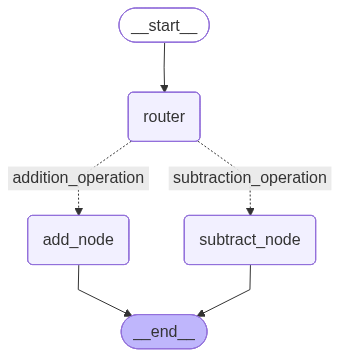

In [15]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [17]:
initial_state_1 = AgentState(number1=10, number2 = 2, operation="+")
print(app.invoke(initial_state_1))

{'number1': 10, 'number2': 2, 'operation': '+', 'finalNumber': 12}


In [18]:
initial_state_2 = AgentState(number1= 24, number2 = 2, operation="-")
print(app.invoke(initial_state_2))

{'number1': 24, 'number2': 2, 'operation': '-', 'finalNumber': 22}
